In [10]:
import numpy as np
import pandas as pd

In [11]:
#import dataset
df = pd.read_csv('spaceship-titanic/train.csv').dropna(axis=0,how='any')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [12]:
from sklearn.preprocessing import MinMaxScaler

#specify target label
target = 'Transported'

data = [name for name in df.columns if name != target]
numeric_data = []
string_data = []
tokenizers = {}

#organize data based on data types
dtypes = dict(df[data].dtypes)

for name in data:
    if str(dtypes[name]) == 'object':
        string_data.append(name)
        
        #create tokenizer
        value_set = sorted(list(set([x if type(x) == str or type(x) == bool else '' for x in df[name]])))
        tokenizer = {token:num for num,token in enumerate(value_set)}
        tokenizers[name] = tokenizer

    else:
        numeric_data.append(name)
print(tokenizers.keys())

#token count for each string feature
n_tokens = {name:len(tokenizer) for name,tokenizer in tokenizers.items()}
#determine network embedding size
n_embeddings = {name:int(np.ceil(np.log(n_token))) for name,n_token in n_tokens.items()}
#create scalers for each numeric feature
scalers = {name:MinMaxScaler(feature_range=(-1.,1.),copy=True) for name in numeric_data}

#scale numeric features
scaled_numeric_data = {name:scalers[name].fit_transform(df[name].to_numpy().copy().reshape(-1,1)).reshape(-1) for name in numeric_data}
scaled_numeric_df = pd.DataFrame(scaled_numeric_data)

#tokenize string features
tokenized_string_data = {name:np.vectorize(tokenizers[name].get)(df[name].to_numpy().copy()) for name in string_data}
tokenized_string_df = pd.DataFrame(tokenized_string_data)

processed_df = scaled_numeric_df.join(tokenized_string_df)

dict_keys(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name'])


In [13]:
processed_df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,-0.012658,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,1,0,137,2,0,4080
1,-0.392405,-0.978024,-0.999396,-0.995919,-0.951000,-0.995673,1,0,0,1823,2,0,3491
2,0.468354,-0.991331,-0.760105,-1.000000,-0.400660,-0.995181,2,1,0,1,2,1,353
3,-0.164557,-1.000000,-0.913930,-0.939443,-0.702874,-0.981019,3,1,0,1,2,0,5536
4,-0.594937,-0.938911,-0.995304,-0.975353,-0.949572,-0.999803,4,0,0,1825,2,0,6464
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,0.037975,-1.000000,-0.542549,-1.000000,-0.853356,-0.992722,6601,1,0,134,0,1,2723
6602,-0.544304,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6602,0,1,4293,1,0,3707
6603,-0.341772,-1.000000,-1.000000,-0.694442,-0.999911,-1.000000,6603,0,0,4298,2,0,2314
6604,-0.189873,-1.000000,-0.929628,-1.000000,-0.968493,-0.681845,6604,1,0,1778,0,0,1244


In [14]:
#split data for training and testing
data_split_mask = np.random.rand(len(df)) < 0.8

train_df = processed_df[data_split_mask].reset_index(drop=True)
train_target_df = df[[target]][data_split_mask].reset_index(drop=True)

test_df = processed_df[~data_split_mask].reset_index(drop=True)
test_target_df = df[[target]][~data_split_mask].reset_index(drop=True)

In [15]:
from sklearn.model_selection import GridSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_objective, plot_histogram

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_df, df[target], random_state=0)

In [16]:
# search over different model types

C = [1000, 2000]
gamm = [1, 0.1, 0.01, 0.001, 0.0001]
kernel = ['poly', 'rbf'] #['linear',

SVC_grid = {
    'svc__C': C,
    #'svc__gamma': gamm,
    'svc__kernel': kernel,
}

# Number of trees in random forest
n_estimators = [10, 50, 100] #[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5, 10] # [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
RF_grid = {
    'rf__n_estimators': n_estimators,
    'rf__max_features': max_features,
    'rf__max_depth': max_depth,
    'rf__min_samples_split': min_samples_split,
    'rf__min_samples_leaf': min_samples_leaf,
    'rf__bootstrap': bootstrap
}

#C = np.logspace(-8, 8, 50)
C = [1000, 10000, 100000, 150000, 300000]

penalty = ['l2'] # l1 doesn't exist

LR_grid = {
    'lr__C': C,
    'lr__penalty': penalty,
}

k_range = list(range(20, 75))
weights = ['uniform','distance']
metric = ['euclidean','manhattan']

KNN_grid = {
    'knn__n_neighbors': k_range, # I assume you meant "n_neighbors" for "k"
    'knn__weights': weights,
    'knn__metric': metric,
}

params = [SVC_grid, RF_grid, LR_grid, KNN_grid]

In [17]:
pipe_1 = Pipeline(steps=[('svc', SVC(random_state=0))])
opt = GridSearchCV(
    pipe_1, params[0], cv=3, n_jobs=-1, scoring='roc_auc'
)

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))

KeyboardInterrupt: 

In [ ]:
pipe_2 = Pipeline(steps=[('rf', RandomForestClassifier(random_state=0))])
opt = GridSearchCV(
    pipe_2, params[1], cv=3, n_jobs=-1, scoring='roc_auc'
)

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))

KeyboardInterrupt: 

In [ ]:
pipe_3 = Pipeline(steps=[('lr', LogisticRegression(random_state=0))])
opt = GridSearchCV(
    pipe_3, params[2], cv=3, n_jobs=-1, scoring='roc_auc'
)

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))

val. score: 0.7930711970607992
test score: 0.7605778518463147
best params: {'lr__C': 150000, 'lr__penalty': 'l2'}


In [ ]:
pipe_4 = Pipeline(steps=[('knn', KNeighborsClassifier())])
opt = GridSearchCV(
    pipe_4, params[3], cv=3, n_jobs=-1, scoring='roc_auc'
)

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))

val. score: 0.6054600214736116
test score: 0.6211071878238361
best params: {'knn__metric': 'manhattan', 'knn__n_neighbors': 58, 'knn__weights': 'uniform'}


In [18]:
from tensorflow.python import keras
from keras.models import Model
from keras.layers import Input,Dense,BatchNormalization,Concatenate,GaussianNoise
from keras.optimizers import Nadam

In [19]:
#define latent dimension size
latent_dim = int(np.ceil(np.log(len(X_train)*len(processed_df))))

In [20]:
#input for random seed vecotors
latent_inputs = Input(shape=(latent_dim,),name='latent')
#input for target specification
target_inputs = Input(shape=(2,),name='target')

In [21]:
inputs = {'latent':latent_inputs,'target':target_inputs}

In [22]:
net = Concatenate()([latent_inputs,target_inputs])

In [23]:
for _ in range(2):
    net = Dense(32+len(processed_df), activation='relu',
                kernel_initializer='he_uniform')(net)
    net = BatchNormalization()(net)

In [24]:
outputs = {}
#numeric data outputs
for name in numeric_data:
    outputs[name] = Dense(1,activation='tanh',
                            kernel_initializer='glorot_uniform',name=name)(net)

In [25]:
string_nets = Dense(len(string_data),activation='relu',
                        kernel_initializer='he_uniform')(net)
string_nets = BatchNormalization()(string_nets)

In [26]:
#string data outputs
for name,n_token in n_tokens.items():
    string_net = Dense(n_embeddings[name],activation='relu',
                        kernel_initializer='he_uniform')(string_nets)
    string_net = BatchNormalization()(string_net)
    outputs[name] = Dense(n_token,activation='softmax',
                            kernel_initializer='glorot_uniform',name=name)(net)

In [27]:
generator = Model(inputs=inputs, outputs=outputs)
generator.compile(loss='categorical_crossentropy',
                      optimizer=Nadam(clipnorm=1.))

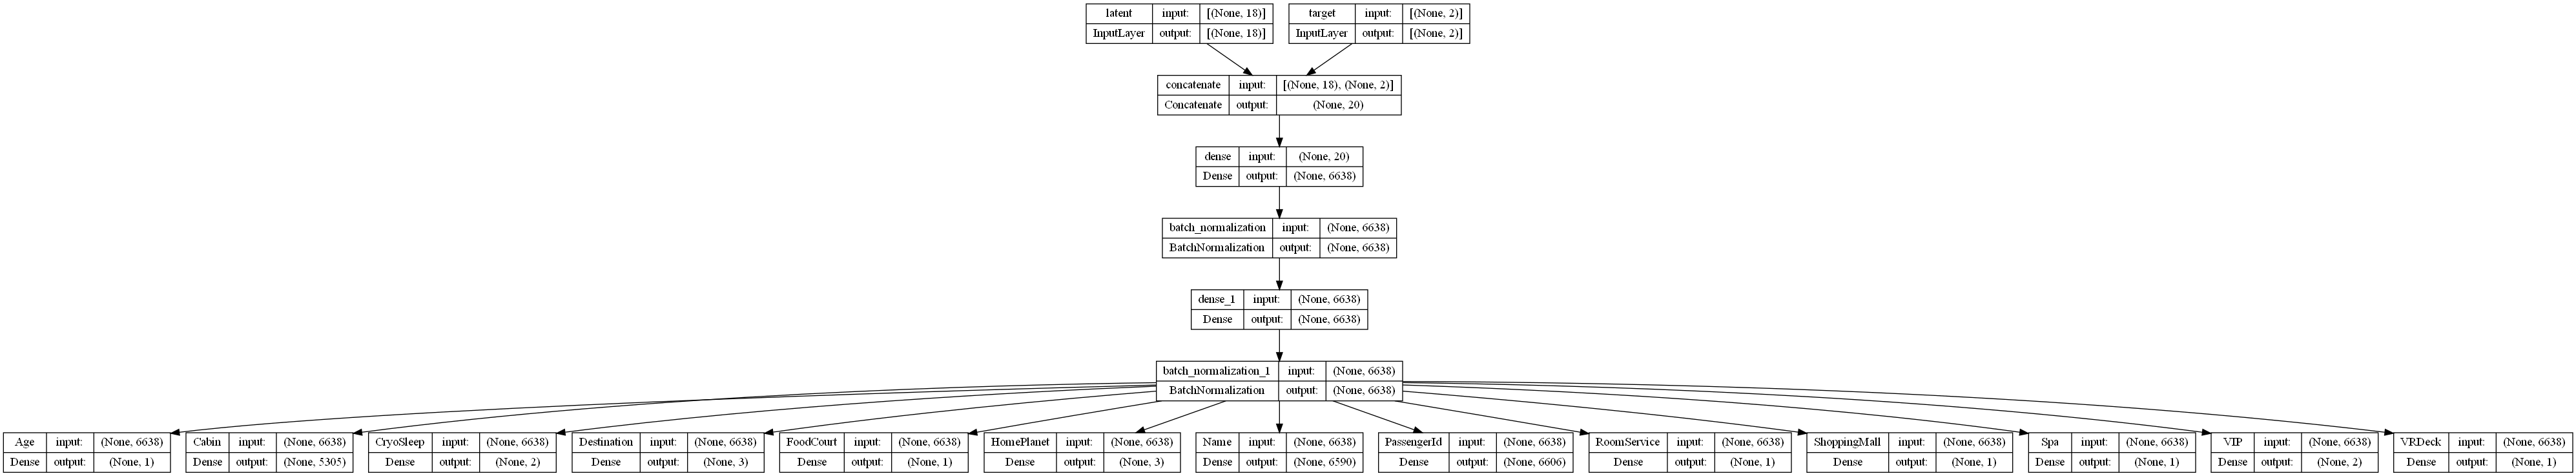

In [28]:
from keras.utils import plot_model
plot_model(generator, to_file='generator.png', show_shapes=True, show_layer_names=True)

In [ ]:
processed_df["Name"]

0       4080
1       3491
2        353
3       5536
4       6464
        ... 
6601    2723
6602    3707
6603    2314
6604    1244
6605    4948
Name: Name, Length: 6606, dtype: int32

In [ ]:
inputs = {}
numeric_nets = []
string_nets = []

In [ ]:
#numerical data inputs
for name in numeric_data:
    numeric_input = Input(shape=(1,),name=name)
    inputs[name] = numeric_input
    
    numeric_net = GaussianNoise(0.01)(numeric_input)
    numeric_nets.append(numeric_net)

In [ ]:
#string data inputs
for name,n_token in n_tokens.items():
    string_input = Input(shape=(n_token,),name=name)
    inputs[name] = string_input

    string_net = GaussianNoise(0.05)(string_input)
    string_net = Dense(n_embeddings[name],activation='relu',
                        kernel_initializer='he_uniform')(string_net)
    string_nets.append(string_net)

In [ ]:
string_nets = Concatenate()(string_nets)
string_nets = BatchNormalization()(string_nets)
string_nets = [Dense(len(string_data),activation='relu',
                        kernel_initializer='he_uniform')(string_nets)]

In [ ]:
net = Concatenate()(numeric_nets + string_nets)
net = BatchNormalization()(net)

In [ ]:
for _ in range(2):
    net = Dense(64+len(data), activation='relu',
                kernel_initializer='he_uniform')(net)
    net = BatchNormalization()(net)

In [ ]:
#discrimination/classification
outputs = Dense(3, activation='softmax',
                kernel_initializer='glorot_uniform')(net)

discriminator = Model(inputs=inputs, outputs=outputs)
discriminator.compile(loss='categorical_crossentropy',
                        optimizer=Nadam(clipnorm=1.))

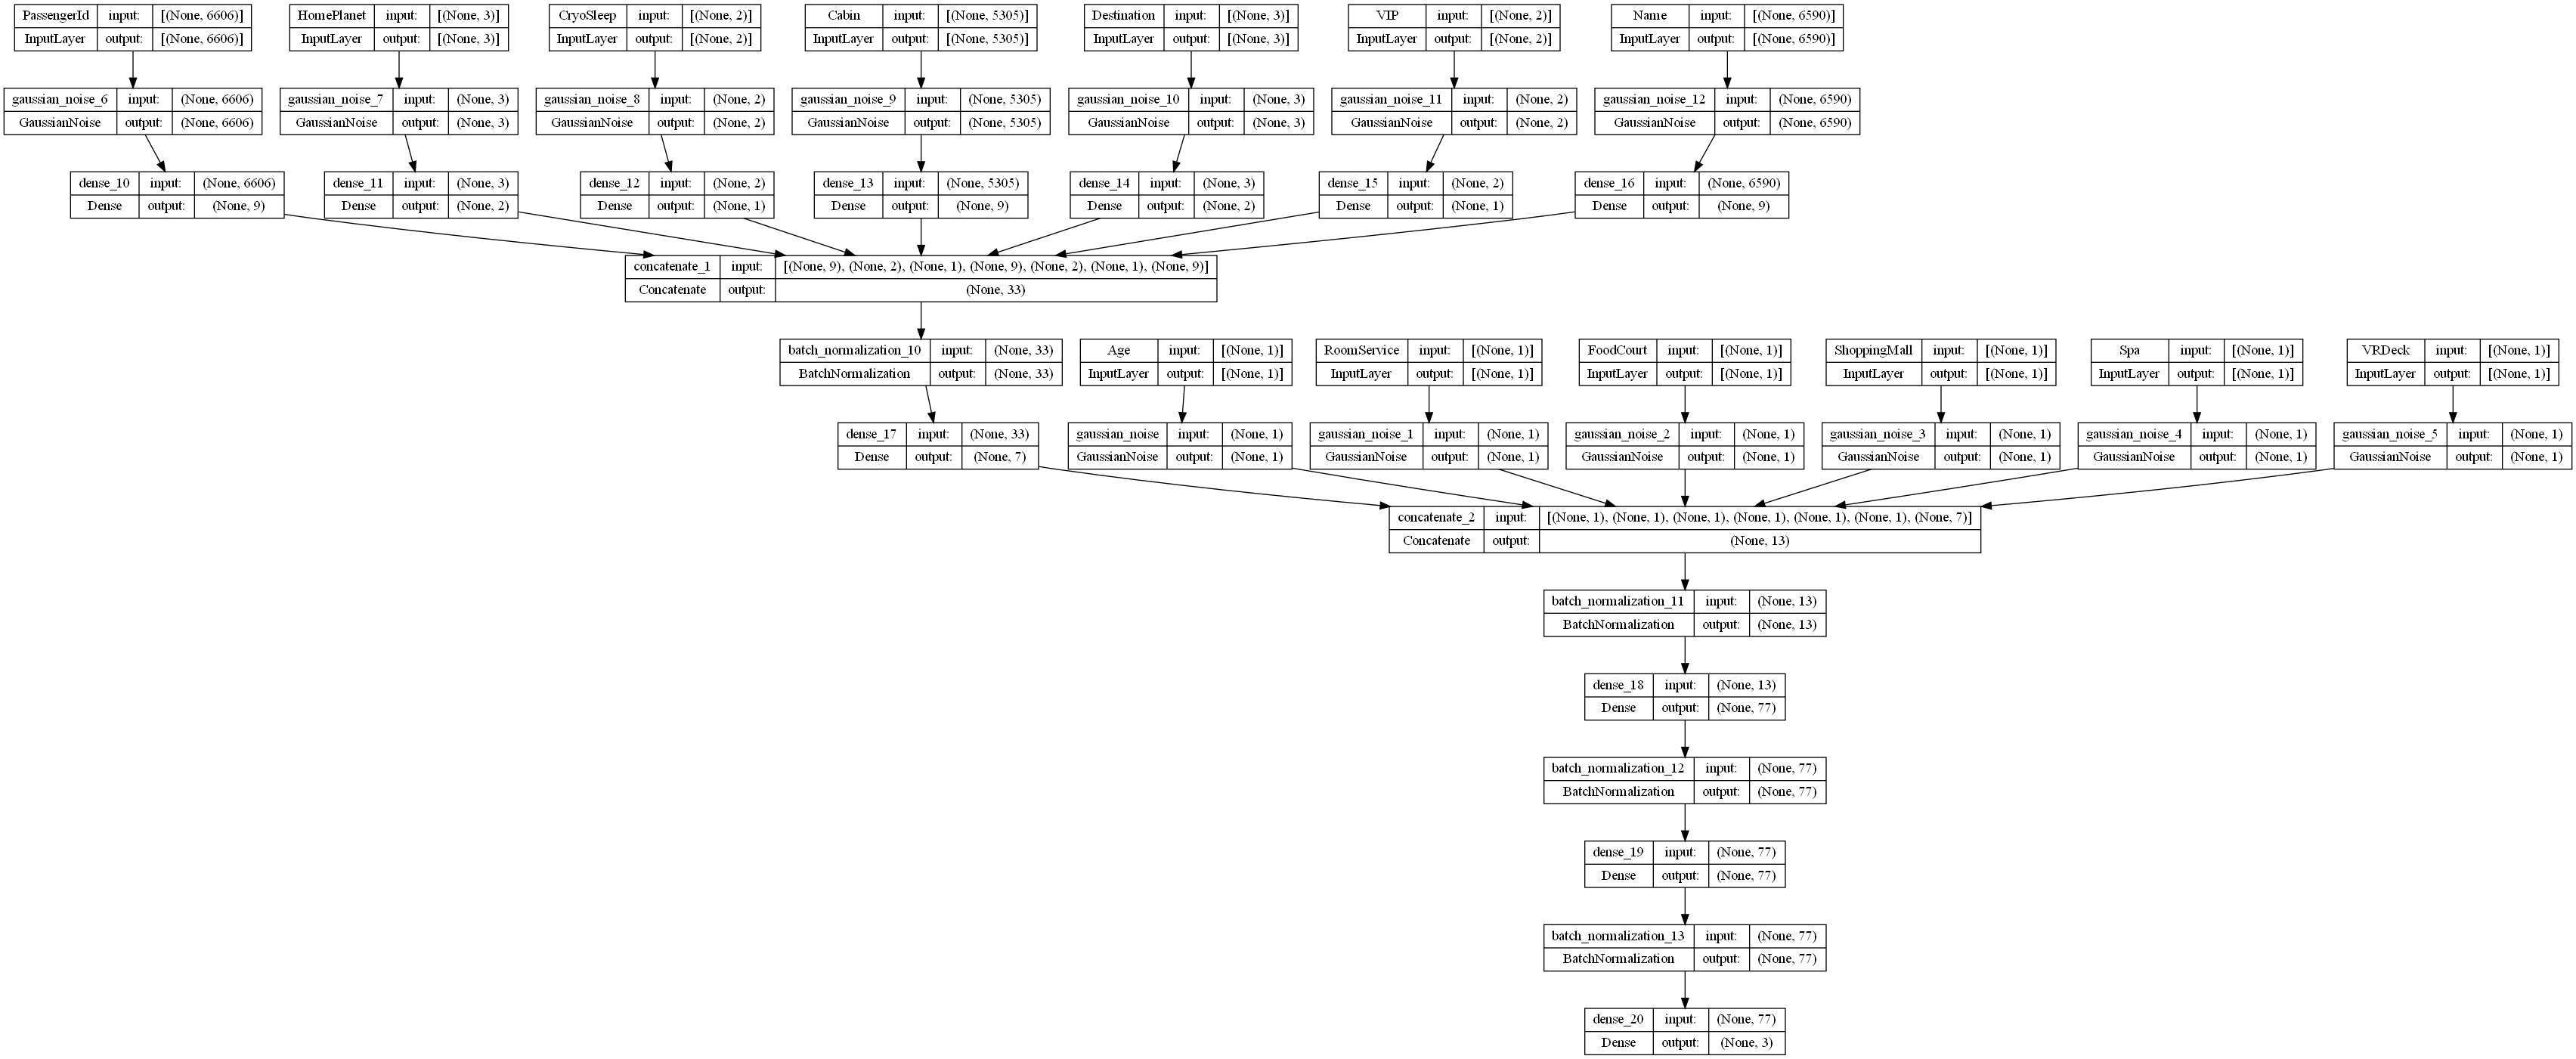

In [ ]:
plot_model(discriminator, to_file='discriminator.png', show_shapes=True, show_layer_names=True)

In [ ]:
#disable discriminator training
discriminator.trainable = False


In [ ]:
#input for random seed vecotors
latent_inputs = Input(shape=(latent_dim,),name='latent')
#input for target specification
target_inputs = Input(shape=(2,),name='target')

inputs = {'latent':latent_inputs,'target':target_inputs}

net = generator([latent_inputs, target_inputs])
outputs = discriminator(net)

gan = Model(inputs=inputs, outputs=outputs)
gan.compile(loss='categorical_crossentropy', optimizer=Nadam(clipnorm=1.))

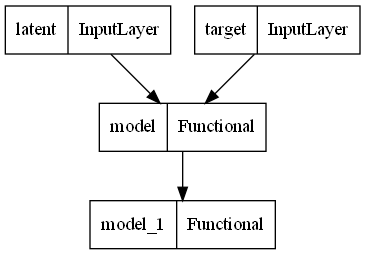

In [ ]:
plot_model(gan, to_file='gan.png')